<a href="https://colab.research.google.com/github/RifatMuhtasim/Deep_Learning/blob/main/Learn/17.Gpu_Bench_Marking_With_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Load the datasets

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
def Plot_sample(index):
  plt.figure(figsize=(12, 1))
  plt.imshow(X_train[index])

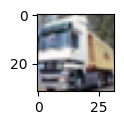

In [7]:
Plot_sample(1)

## Scaling

In [8]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

To make categorical variable now we need to do one hot encoding.

In [9]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10, dtype="float32")
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Building Model

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid"),
])

model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8134 - accuracy: 0.3540
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6220 - accuracy: 0.4292
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5391 - accuracy: 0.4554
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4788 - accuracy: 0.4780
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4288 - accuracy: 0.4968
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3874 - accuracy: 0.5139
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3505 - accuracy: 0.5252
Epoch 8/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3175 - accuracy: 0.5358
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2816 - accuracy: 0.5498
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.

In [18]:
# accuracy
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.3446 - accuracy: 0.5240


[1.3445804119110107, 0.5239999890327454]

In [23]:
def Check_the_prediction(x):
  y_pred_value = np.argmax(model.predict(X_test_scaled)[x])
  print("Prediction value is:", y_pred_value)
  actual_value = y_test[x][0]
  print("Actual value is:", actual_value)

In [29]:
Check_the_prediction(123)

313/313 [==============================] - 1s 2ms/step
Prediction value is: 2
Actual value is: 2


# Compare the performance test by CPU vs GPU

In [30]:
def Get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid"),
  ])

  model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=['accuracy'])
  return model

In [32]:
%%timeit -n1 -r1

with tf.device("/CPU:0"):
  CPU_Model = Get_model()
  CPU_Model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 135s 86ms/step - loss: 1.8131 - accuracy: 0.3541
2min 25s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [33]:
%%timeit -n1 -r1

with tf.device("/GPU:0"):
  GPU_Model = Get_model()
  GPU_Model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8075 - accuracy: 0.3561
12.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
